# my_first_keras_nn

In [3]:
from keras.datasets import mnist

In [15]:
(x_train, y_train) ,(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 42s 4us/step


In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

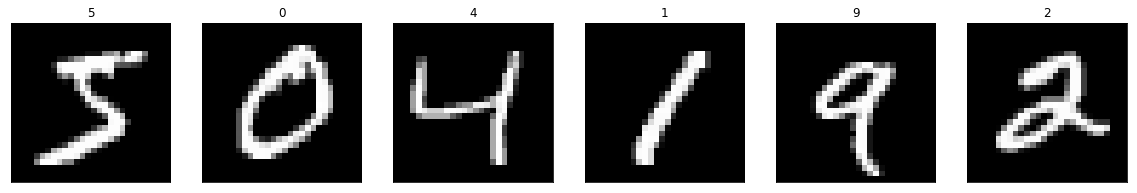

In [22]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [24]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [25]:
from keras.utils import np_utils

In [26]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [27]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
from keras.models import Sequential
from keras.layers import Dense ,Flatten, Activation, Dropout

## define model

In [80]:
model = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [81]:
#rmsprop
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

## 训练之前看看模型效果，如果已经很好了，训练也没什么意义

In [82]:
score = model.evaluate(x_test,y_test,verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' %accuracy)

Test accuracy: 10.5200%


## 训练模型

In [83]:
from keras.callbacks import ModelCheckpoint

In [84]:
check_pointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)

In [85]:
hist = model.fit(
    x_train, y_train, batch_size=128, epochs=100,
    validation_split=0.2 ,callbacks=[check_pointer],
    verbose=1, shuffle=True
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 20us/step - loss: 1.7323 - acc: 0.4541 - val_loss: 0.9535 - val_acc: 0.8036

Epoch 00001: val_loss improved from inf to 0.95351, saving model to mnist.model.best.hdf5
Epoch 2/100
48000/48000 [==============================] - 1s 20us/step - loss: 0.9520 - acc: 0.7080 - val_loss: 0.5548 - val_acc: 0.8622

Epoch 00002: val_loss improved from 0.95351 to 0.55475, saving model to mnist.model.best.hdf5
Epoch 3/100
48000/48000 [==============================] - 1s 21us/step - loss: 0.7156 - acc: 0.7788 - val_loss: 0.4380 - val_acc: 0.8842

Epoch 00003: val_loss improved from 0.55475 to 0.43800, saving model to mnist.model.best.hdf5
Epoch 4/100
48000/48000 [==============================] - 1s 21us/step - loss: 0.6043 - acc: 0.8150 - val_loss: 0.3820 - val_acc: 0.8968

Epoch 00004: val_loss improved from 0.43800 to 0.38197, saving model to mnist.model.best.hdf5
Epoch 5/100
48000/4800

Epoch 36/100
48000/48000 [==============================] - 1s 24us/step - loss: 0.2174 - acc: 0.9353 - val_loss: 0.1491 - val_acc: 0.9566

Epoch 00036: val_loss improved from 0.15018 to 0.14913, saving model to mnist.model.best.hdf5
Epoch 37/100
48000/48000 [==============================] - 1s 24us/step - loss: 0.2144 - acc: 0.9379 - val_loss: 0.1461 - val_acc: 0.9566

Epoch 00037: val_loss improved from 0.14913 to 0.14606, saving model to mnist.model.best.hdf5
Epoch 38/100
48000/48000 [==============================] - 1s 23us/step - loss: 0.2093 - acc: 0.9378 - val_loss: 0.1448 - val_acc: 0.9575

Epoch 00038: val_loss improved from 0.14606 to 0.14478, saving model to mnist.model.best.hdf5
Epoch 39/100
48000/48000 [==============================] - 1s 24us/step - loss: 0.2082 - acc: 0.9394 - val_loss: 0.1436 - val_acc: 0.9575

Epoch 00039: val_loss improved from 0.14478 to 0.14364, saving model to mnist.model.best.hdf5
Epoch 40/100
48000/48000 [==============================] - 1s 2

48000/48000 [==============================] - 1s 22us/step - loss: 0.1518 - acc: 0.9552 - val_loss: 0.1105 - val_acc: 0.9672

Epoch 00071: val_loss improved from 0.11130 to 0.11050, saving model to mnist.model.best.hdf5
Epoch 72/100
48000/48000 [==============================] - 1s 21us/step - loss: 0.1497 - acc: 0.9560 - val_loss: 0.1097 - val_acc: 0.9674

Epoch 00072: val_loss improved from 0.11050 to 0.10970, saving model to mnist.model.best.hdf5
Epoch 73/100
48000/48000 [==============================] - 1s 21us/step - loss: 0.1470 - acc: 0.9563 - val_loss: 0.1090 - val_acc: 0.9670

Epoch 00073: val_loss improved from 0.10970 to 0.10897, saving model to mnist.model.best.hdf5
Epoch 74/100
48000/48000 [==============================] - 1s 22us/step - loss: 0.1466 - acc: 0.9561 - val_loss: 0.1089 - val_acc: 0.9674

Epoch 00074: val_loss improved from 0.10897 to 0.10885, saving model to mnist.model.best.hdf5
Epoch 75/100
48000/48000 [==============================] - 1s 22us/step - lo

In [86]:
model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 0s 26us/step


[0.092554082469875, 0.9725]